In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_country=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
data_greece=data_country[data_country['Country']=='Greece'].copy()
data_greece['dt']=pd.to_datetime(data_greece['dt'])

In [7]:
data_global=pd.read_csv('GlobalTemperatures.csv')
data_global['dt']=pd.to_datetime(data_global['dt'])
co2_ppm=pd.read_csv('co2.csv')

In [9]:
annual_mean_global=data_global.groupby(data_global['dt'].dt.year).mean()
temperature_global=annual_mean_global.loc[1951:1980].mean()['LandAndOceanAverageTemperature']
annual_mean_global['Anomaly']=annual_mean_global['LandAndOceanAverageTemperature']-temperature_global



In [10]:
annual_mean_greece=data_greece.groupby(data_greece['dt'].dt.year).mean()
temperature_greece=annual_mean_greece.loc[1951:1980].mean()['AverageTemperature']
annual_mean_greece['Anomaly']=annual_mean_greece['AverageTemperature']- temperature_greece

<AxesSubplot:ylabel='dt'>

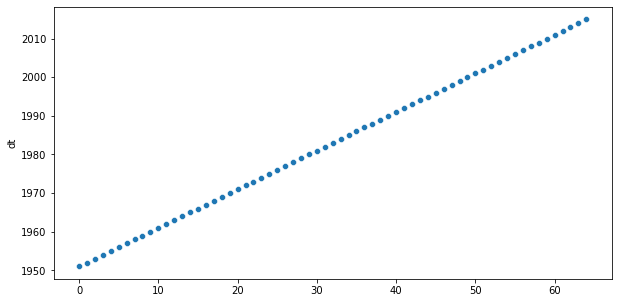

In [11]:
plt.figure(figsize=(10,5))
plt.title=('Annual anomaly from base mean global')
sns.scatterplot(data=annual_mean_global.loc[1951:2015]['Anomaly'].index)

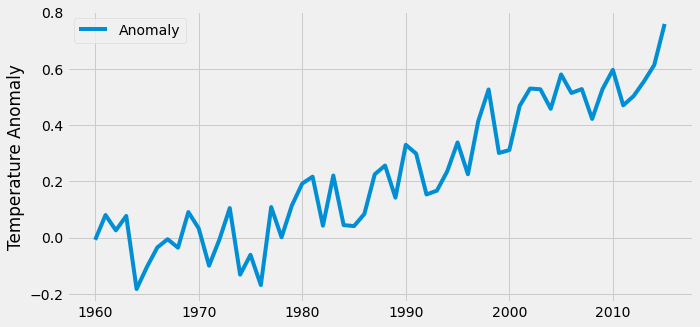

In [13]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_global.loc[1960:2015]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title=("Annual anomaly from base mean temperature (Global)")
plt.xlabel('')
plt.ylabel('Temperature Anomaly')
plt.show()

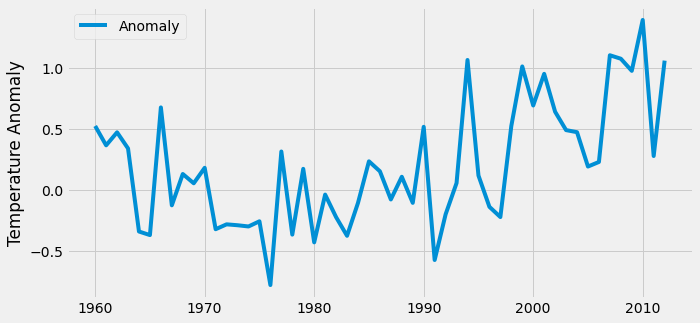

In [14]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_greece.loc[1960:2012]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title=("Annual anomaly from base mean temperature (Greece)")
plt.xlabel('')
plt.ylabel('Temperature Anomaly')
plt.show()

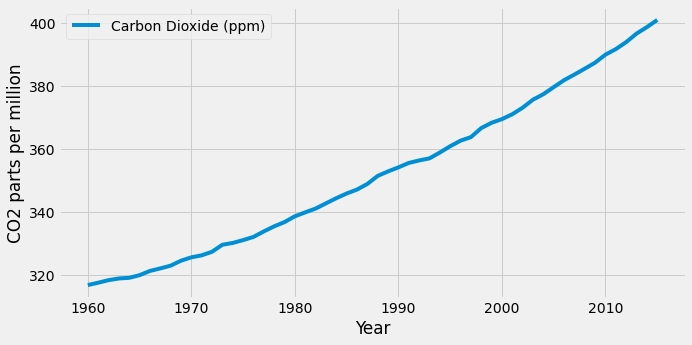

In [15]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_co2_ppm = co2_ppm.groupby(co2_ppm["Year"]).mean()
annual_co2_ppm.loc[1960:2015]["Carbon Dioxide (ppm)"].plot(figsize = (10,5), grid=True, legend=True)
plt.title=("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.show()

In [16]:
annual_co2_temp = pd.merge(annual_mean_global.loc[1960:2015], annual_co2_ppm.loc[1960:2015], left_index=True, right_index=True)
annual_co2_temp = annual_co2_temp[["LandAndOceanAverageTemperature", "Anomaly", "Carbon Dioxide (ppm)"]].copy()
annual_co2_temp.corr()

,LandAndOceanAverageTemperature,Anomaly,Carbon Dioxide (ppm)
LandAndOceanAverageTemperature,1.000000,1.000000,0.923603
Anomaly,1.000000,1.000000,0.923603
Carbon Dioxide (ppm),0.923603,0.923603,1.000000


<AxesSubplot:xlabel='Anomaly', ylabel='Carbon Dioxide (ppm)'>

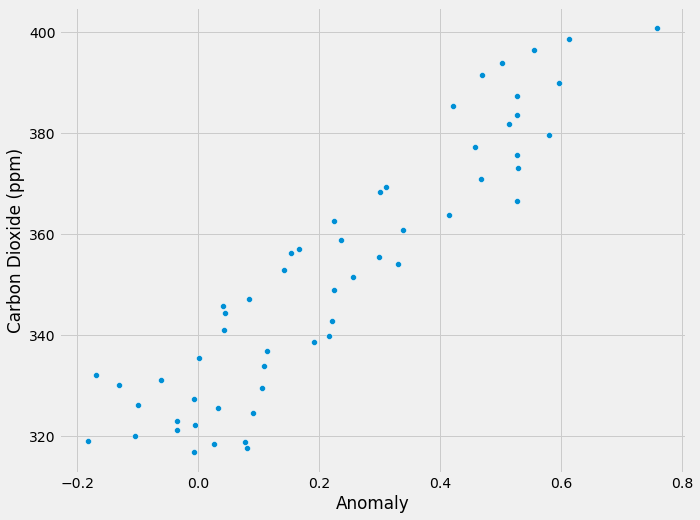

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Anomaly",y="Carbon Dioxide (ppm)", data=annual_co2_temp)